In [1]:
import pandas as pd
df=pd.read_csv("c:/data/titanic/train3.csv")
df.head()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


In [2]:
df.columns

Index(['Survived', 'Pclass1', 'Pclass2', 'Pclass3', 'male', 'female', 'Age',
       'SibSp', 'Parch', 'Fare'],
      dtype='object')

In [3]:
from sklearn.model_selection import train_test_split
cols=['Pclass1','Pclass2','Pclass3','male','female','Age','SibSp','Parch','Fare']
X=df[cols]
y=df["Survived"]

In [4]:
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Survived'])
df2=pd.concat([X_samp,y_samp],axis=1)

In [5]:
X=X_samp[cols]
y=y_samp["Survived"]

In [6]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, stratify=y, random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(C=1000.0, random_state=0)
model

LogisticRegression(C=1000.0, random_state=0)

In [8]:
model.fit(X_train,y_train)
pred=model.predict(X_test)

In [9]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7641681901279708
0.8029197080291971


In [10]:
(y_test != pred).sum()

27

In [11]:
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))
print(precision_score(y_test,pred))
print(recall_score(y_test,pred))
print(f1_score(y_test,pred))

0.8029197080291971
0.8059701492537313
0.7941176470588235
0.8


In [12]:
from sklearn.metrics import confusion_matrix
y=[1,0,1,1,0,1]
pred=[0,0,1,1,0,1]
cm=confusion_matrix(y,pred)
print(cm)
tn,fp,fn,tp=confusion_matrix(y,pred).ravel()
print(tn,fp,fn,tp)

[[2 0]
 [1 3]]
2 0 1 3


In [13]:
y=[0,1,0,0]
pred=[0,1,1,0]
ps=precision_score(y,pred)
print(ps)

0.5


In [15]:
import numpy as np
y = np.array([0, 1, 1, 0])
pred = np.array([0, 1, 0, 0])
recall_score(y,pred)

0.5

In [16]:
from sklearn.metrics import classification_report
y = np.array([0, 1, 1, 1])
pred = np.array([0, 1, 0, 0])
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



In [17]:
import matplotlib.pyplot as plt
costs=[0.001,0.01,0.1,1,10,100,1000]
results=[]
for c in costs:
    params={'C':c, 'max_iter':1000}
    clf=LogisticRegression(**params).fit(X_train,y_train)
    score=clf.score(X_test,y_test)
    results.append(score)
print(results)

[0.6496350364963503, 0.781021897810219, 0.8029197080291971, 0.8029197080291971, 0.8029197080291971, 0.8029197080291971, 0.8029197080291971]


최고 정확도: 0.8029197080291971
최적의 C: 0.1


Text(0, 0.5, 'Accuracy')

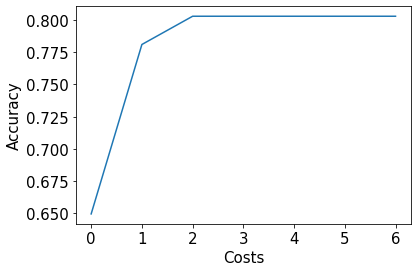

In [18]:
m=max(results)
for i,a in enumerate(results):
    if a==m:
        n=i
        break
print('최고 정확도:',m)
print('최적의 C:',costs[n])

plt.rcParams["font.size"]=15
plt.plot(range(len(costs)), results)
plt.xlabel('Costs')
plt.ylabel('Accuracy')